In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("Q2TrueFakeNewsDataset.csv")



In [5]:
import re
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))
def transform(text):
    t = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(t.lower())
    tokens=[stemmer.stem(i) for i in tokens if i not in stop]
    return " ".join(tokens)

df["clean"]=df["TEXT"].apply(transform)




In [4]:
df['Class']=LabelEncoder().fit_transform(df['Class'])

In [5]:
df

,TEXT,Class,clean
0,WASHINGTON (Reuters) - The head of a conservat...,1,washington reuter head conserv republican fact...
1,WASHINGTON (Reuters) - Transgender people will...,1,washington reuter transgend peopl allow first ...
2,WASHINGTON (Reuters) - The special counsel inv...,1,washington reuter special counsel investig lin...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,washington reuter trump campaign advis georg p...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,seattlewashington reuter presid donald trump c...
...,...,...,...
9994,It s no secret Republicans are salivating to f...,0,secret republican saliv find someth anyth take...
9995,Republicans are about to lose a huge source of...,0,republican lose huge sourc fund justic depart ...
9996,A pawn working for Donald Trump claimed that w...,0,pawn work donald trump claim women respect vot...
9997,Fox News is desperate to sabotage Hillary Clin...,0,fox news desper sabotag hillari clinton campai...


In [6]:
X_train,X_test,y_train,y_test=train_test_split(df['clean'],df['Class'],test_size=0.2,random_state=42)

In [7]:
y_train

9253    0
1561    1
1670    1
6086    0
7332    0
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: Class, Length: 7999, dtype: int32

In [19]:
vectorizer=TfidfVectorizer(max_features=1000)
X_train_tfidf=vectorizer.fit_transform(X_train).toarray()
X_test_tfidf=vectorizer.transform(X_test).toarray()
print(type(X_train),type(y_train))
print(type(X_train_tfidf),type(y_train))
print(X_train_tfidf.shape)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
(7999, 1000)


In [18]:
type(y_train),y_test,y_train.shape

(pandas.core.series.Series,
 5344    0
 7444    0
 1731    1
 8719    0
 4521    1
        ..
 9448    0
 8284    0
 7852    0
 1095    1
 8871    0
 Name: Class, Length: 2000, dtype: int32,
 (7999,))

In [27]:

model=Sequential([
    Dense(128,activation="relu",input_shape=(X_train_tfidf.shape[1],)),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])
y_train.shape

(7999,)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_tfidf,y_train,batch_size=4)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9623 - loss: 0.1330


In [ ]:
df1=pd.read_csv("Q1ecommerceDataset.csv")

In [ ]:
df1.columns=['Household','Description']
df1

In [ ]:
import re
from nltk.tokenize import word_tokenize

def transform(text):
    if not isinstance(text, str):
        return ""  # or return np.nan if you prefer keeping NaN
    t = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(t.lower())
    tokens = [stemmer.stem(i) for i in tokens if i not in stop]
    return " ".join(tokens)

df1["clean"] = df1["Description"].apply(transform)


In [15]:
df1.isna().sum()

Household      0
Description    1
clean          0
dtype: int64

In [16]:
df1['Household']=LabelEncoder().fit_transform(df1['Household'])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df1['clean'],df1['Household'],test_size=0.2,random_state=42)

In [32]:
vectorizer=TfidfVectorizer(max_features=1000)
X_train_tfidf=vectorizer.fit_transform(X_train).toarray()
X_test_tfidf=vectorizer.transform(X_test).toarray()
X_train_tfidf.shape

(40339, 1000)

In [19]:
y_train.unique()

array([1, 2, 0, 3])

In [71]:
print(X_train_tfidf.shape,(y_train.shape))
y_train.shape

(40339, 1000) (40339, 4)


(40339, 4)

In [72]:

model=Sequential([
    Dense(128,activation="relu",input_shape=(X_train_tfidf.shape[1],)),
    Dense(64,activation="relu"),
    Dense(4,activation="relu")
])
X_train_tfidf.shape,y_train.shape

C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


((40339, 1000), (40339, 4))

In [75]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_tfidf,y_train,batch_size=2)

20170/20170 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.2359 - loss: nan 


model.summary()

In [40]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,934 (1.56 MB)

 Trainable params: 136,644 (533.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 273,290 (1.04 MB)

In [66]:
from sklearn.metrics import confusion_matrix
y_probs = model.predict(X_test_tfidf)
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
import matplotlib.pyplot as plt

316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 
(10085,)


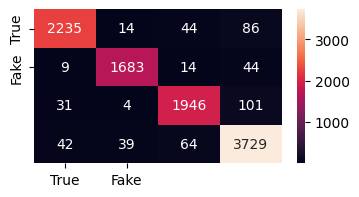

In [63]:
plt.figure(figsize=(4,2))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['True','Fake'],yticklabels=['True','Fake'])
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert predictions to class labels
y_probs = model.predict(X_test_tfidf)
y_pred = np.argmax(y_probs, axis=1)

# Convert one-hot test labels to class indices
y_true = np.argmax(y_test, axis=1)

# Compute 2x2 confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (2x2):")
print(cm)


316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Confusion Matrix (2x2):
[[2235   14   44   86]
 [   9 1683   14   44]
 [  31    4 1946  101]
 [  42   39   64 3729]]


In [70]:

print(classification_report(y_true, y_pred, target_names=['','','True', 'Fake']))

              precision    recall  f1-score   support

                   0.96      0.94      0.95      2379
                   0.97      0.96      0.96      1750
        True       0.94      0.93      0.94      2082
        Fake       0.94      0.96      0.95      3874

    accuracy                           0.95     10085
   macro avg       0.95      0.95      0.95     10085
weighted avg       0.95      0.95      0.95     10085

